In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np

def range_float(start,stop,step):
    x = start
    while x< stop:
        yield x
        x = x + step
    
test = [(round(y,2),x) for x in range(15000,100000,1000) for y in range_float(2.5,5,0.1) ]
average, price = map(list,zip(*test))
data = {'Average': average, 'Price': price }
df = pd.DataFrame.from_dict(data)
df['UserDemand'] = [ '0-5%' if row['Average']>=2.5 and row['Average']<=2.8 else '5-10%' if row['Average']>=2.8 and row['Average']<3.0 else '50-60%' if row['Average']>=3.0 and row['Average']<3.5 and row['Price']>=15000 and row['Price']<20000 or row['Average']>=3.5 and row['Average']<4 and row['Price']>=20000 and row['Price']<25000 else '60-70%' if row['Average']>=4.0 and row['Average']<4.2 and row['Price']>=20000 and row['Price']<25000 or row['Average']>=4.3 and row['Average']<4.8 and row['Price']>=28000 and row['Price']<330000 or row['Average']>=3.0 and row['Average']<3.5 and row['Price']>=10000 and row['Price']<15000 else '10-20%' if row['Average']>=3.0 and row['Average']<3.5 and row['Price']>=20000 and row['Price']<22000 or row['Average']>=4.0 and row['Average']<4.5 and row['Price']>=33000 and row['Price']<40000 else '40-50%' if row['Average']>=4.3 and row['Average']<4.5 and row['Price']>=25000 and row['Price']<30000 or row['Average']>=4.5 and row['Average']<4.7 and row['Price']>=35000 and row['Price']<40000 else '20-25%' if row['Average']==4.8 and row['Price']>40000 and row['Price']<55000 else '25-30%' if row['Average']>=3.5 and row['Average']<4.0 and row['Price']>=25000 and row['Price']<30000 or row['Average']>=4.8 and row['Average']<5 and row['Price']>=50000 and row['Price']<80000 else '30-40%' if row['Average']>4.0 and row['Average']<4.2 and row['Price']>=30000 and row['Price']<35000 or row['Average']>4.0 and row['Average']<4.2 and row['Price']>=25000 and row['Price']<30000 or  row['Average']>3.5 and row['Average']<4.0 and row['Price']>=25000 and row['Price']<=27000 else '0-5%' for index,row in df.iterrows()]
df['Prediction'] = ['lot Profit' if row['UserDemand'] == '60-70%' or row['UserDemand'] == '50-60%' else 'Medium Profit' if row['UserDemand'] == '40-50%' or row['UserDemand'] == '25-30%' else 'Low Profit' for index,row  in df.iterrows()]
df

,Average,Price,UserDemand,Prediction
0,2.5,15000,0-5%,Low Profit
1,2.6,15000,0-5%,Low Profit
2,2.7,15000,0-5%,Low Profit
3,2.8,15000,0-5%,Low Profit
4,2.9,15000,5-10%,Low Profit
5,3.0,15000,50-60%,lot Profit
6,3.1,15000,50-60%,lot Profit
7,3.2,15000,50-60%,lot Profit
8,3.3,15000,50-60%,lot Profit
9,3.4,15000,50-60%,lot Profit


In [2]:
print(df['UserDemand'].value_counts())
print(df['Prediction'].value_counts())

0-5%      1566
60-70%     370
5-10%       85
25-30%      80
50-60%      50
10-20%      31
20-25%      14
30-40%       8
40-50%       6
Name: UserDemand, dtype: int64
Low Profit       1704
lot Profit        420
Medium Profit      86
Name: Prediction, dtype: int64


In [3]:
label_quality = LabelEncoder()
df['Prediction'] = label_quality.fit_transform(df['Prediction'])
df['UserDemand'] = label_quality.fit_transform(df['UserDemand'])
df['UserDemand'].value_counts()

0    1566
8     370
6      85
3      80
7      50
1      31
2      14
4       8
5       6
Name: UserDemand, dtype: int64

In [4]:
X = df.drop(['Prediction'],axis=1)
y = df['Prediction']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
clf = SVC(gamma='auto')
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
bar_SVC = round(accuracy_score(y_test, pred_clf)*100)
print(bar_SVC)

98.0


In [11]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)
pred_knn1 = knn1.predict(X_test)
bar_knn1 =round(accuracy_score(y_test, pred_knn1)*100)
print(bar_knn1)

84.0


In [12]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train,y_train)
pred_knn2 = knn2.predict(X_test)
bar_knn5 = round(accuracy_score(y_test, pred_knn2)*100)
print(bar_knn5)

91.0


In [13]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)
bar_rfc=  round(accuracy_score(y_test, pred_rfc)*100)
print(bar_rfc)

100.0


<BarContainer object of 4 artists>

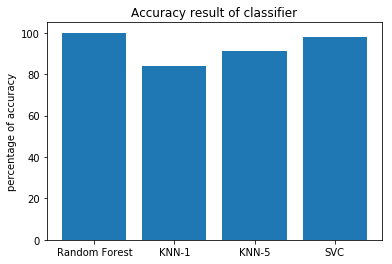

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

classifier = ['Random Forest','KNN-1','KNN-5','SVC']
result = [bar_rfc,bar_knn1,bar_knn5,bar_SVC]

xpos = np.arange(len(classifier))
plt.xticks(xpos,classifier)
plt.title('Accuracy result of classifier')
plt.ylabel('percentage of accuracy')
plt.bar(xpos,result)